In [26]:
import pandas as pd
import collections




datafile = 'COVID tracing apps data_23Jan2021_Junaid Iqbal Khan.xlsx'

df = pd.read_excel(datafile)
df.head()

functionality=df['Functionality'].to_list()

contact_tracing=0
geo_fencing=0
self_diagnosis=0
travel_permit=0
test_reporting=0
quarantine_monitoring=0
information=0
consultation=0
appointment=0
blind_assistance=0
notifications=0
research_data=0


def notisNaN(string):
    return string == string



for j in range(len(functionality)):
  if notisNaN(functionality[j]):
    if "tra" in functionality[j]:
      contact_tracing+=1
    if "fenc" in functionality[j] or "map" in functionality[j] or "with" in functionality[j] or "area" in functionality[j]:
      geo_fencing+=1
    if "ssist" in functionality[j] or "assessment" in functionality[j] or "creen" in functionality[j] or "diagnos" in functionality[j] or "bot" in functionality[j] or "symptom" in functionality[j]:
      self_diagnosis+=1
    if "solation" in functionality[j] or "uarantine" in functionality[j] or "check" in functionality[j]:
      quarantine_monitoring+=1
    if "report" in functionality[j]:
      test_reporting+=1

    if "travel" in functionality[j] or "border" in functionality[j]:
      travel_permit+=1

    if "news" in functionality[j] or "measure" in functionality[j] or "info" in functionality[j] or "uidance" in functionality[j]:
      information+=1

    if "onsult" in functionality[j]:
      consultation+=1
    if "oint" in functionality[j]:
      appointment+=1
    if "blind" in functionality[j]:
      blind_assistance+=1

    if "lert" in functionality[j] or "mask" in functionality[j]:
      notifications+=1
    
    if "esearch" in functionality[j]:
      research_data+=1

feature_list=[contact_tracing,geo_fencing,self_diagnosis,test_reporting,travel_permit, quarantine_monitoring, information, consultation,appointment, blind_assistance, notifications,research_data]
index=["contact tracing" ,"geo-fencing","self diagnosis","test reporting","travel control", "quarantine monitoring", "information", "online consulation", "medical appointment", "blind assistance", "health updates","research data sharing"]


sum_list=sum(feature_list)

feature_list = [i/sum_list * 100 for i in feature_list]

df = pd.DataFrame(list(zip(index, feature_list)),
               columns =['Features', 'Percentage'])

df.head(20)



,Features,Percentage
0,contact tracing,47.972973
1,geo-fencing,6.081081
2,self diagnosis,11.486486
3,test reporting,6.756757
4,travel control,2.027027
5,quarantine monitoring,8.108108
6,information,9.459459
7,online consulation,2.702703
8,medical appointment,2.027027
9,blind assistance,0.675676


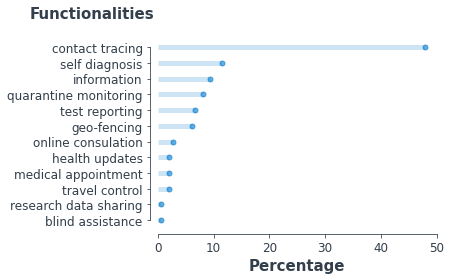

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
percentages = pd.Series(feature_list, 
                        index=index)
df = pd.DataFrame({'percentage' : percentages})
df = df.sort_values(by='percentage')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Percentage', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Functionalities', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0,50)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('hist_functionalities.jpg', dpi=1000, bbox_inches='tight')